In [18]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.ticker as ticker

In [19]:
# some setting for this notebook to actually show the graphs inline
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [20]:
X=np.array([[0,0], [10,10], [5,27], [21,21], [28,6], [33,33]])

(6, 2)


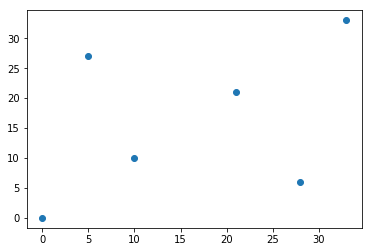

In [21]:
print (X.shape)  # 6 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [22]:
# generate the linkage matrix
#'single' = Nearest Point Algorithm.
#distancia minima entre dos puntos de los clusters
Z = linkage(X, 'single')

In [23]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

#Compares the actual pairwise distances of all your samples to those implied by the hierarchical clustering. 
#The closer the value is to 1, the better the clustering preserves the original distances.

c, coph_dists = cophenet(Z, pdist(X))
c

0.37087900480449537

No matter what method and metric you pick, the linkage() function will use that method and metric to calculate the distances of the clusters (starting with your n individual samples (aka data points) as singleton clusters)) and in each iteration will merge the two clusters which have the smallest distance according the selected method and metric. 
It will return an array of length n - 1 giving you information about the n - 1 cluster merges which it needs to pairwise merge n clusters. Z[i] will tell us which clusters were merged in the i-th iteration, let's take a look at the first two points that were merged:

In [24]:
#each row of the resulting array has the format [idx1, idx2, dist, sample_count].
#o sea une los puntos 0 y 1 de nuestro X con distancia 14.14 y crea un cluster de 2 samples
Z[0]

array([ 0.     ,  1.     , 14.14214,  2.     ])

In [25]:
#1° it: 0 con 1. 2 samples. forma nuevo cluster 6
#2° it: 3 con 6. 3 samples. forma nuevo cluster 7
#3° it: 4 con 7. 4 samples. forma nuevo cluster 8
#4° it: 5 con 6. 5 samples. forma nuevo cluster 9
#5° it: 2 con 9. 6 samples. forma nuevo cluster 10
Z

array([[ 0.     ,  1.     , 14.14214,  2.     ],
       [ 3.     ,  6.     , 15.55635,  3.     ],
       [ 4.     ,  7.     , 16.55295,  4.     ],
       [ 5.     ,  8.     , 16.97056,  5.     ],
       [ 2.     ,  9.     , 17.08801,  6.     ]])

In [26]:
#vemos como esta formado el cluster 7
X[[0, 1, 3]]

array([[ 0,  0],
       [10, 10],
       [21, 21]])

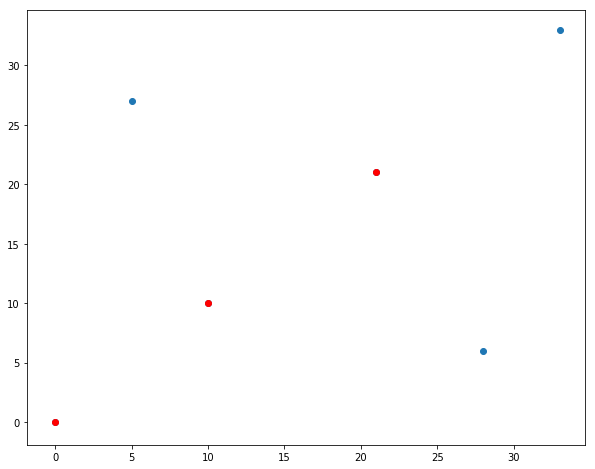

In [27]:
#en rojo se ven los puntos del cluster 7
idxs = [0, 1, 3]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='r')  # plot interesting points in red again
plt.show()


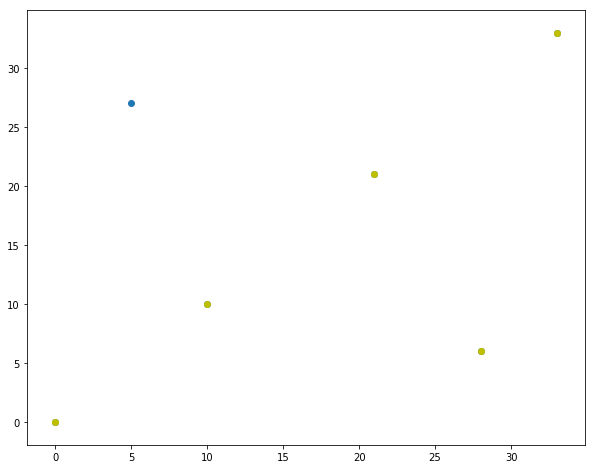

In [28]:
#vemos los del cluster 9
idxs = [0, 1, 3, 4, 5]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='y')
plt.show()


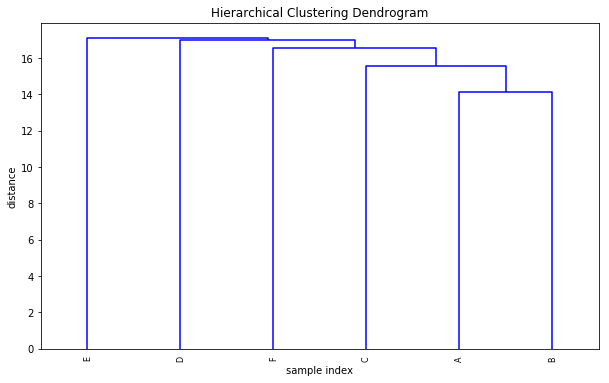

In [29]:
# calculate full dendrogram
plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
locs, labels = plt.xticks()
plt.xticks(locs,('E', 'D', 'F', 'C', 'A','B'))
plt.show()



- horizontal lines are cluster merges
- vertical lines tell you which clusters/labels were part of merge forming that new cluster
- heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster
- if there's a huge jump of the distance they indicate that something is merged here, that maybe just shouldn't be merged